In [2]:
using Winston, LinearAlgebra, Jtac

In [3]:
function init_plot(heatmap)
    colormap("grays")

    p = FramedPlot( aspect_ratio = 1, xrange = (0,9), yrange = (0, 9), draw_axis=false )

    # TODO: Rescaling shoud happen in the color map
    img = Winston.data2rgb(heatmap  .^ (1/2), (0.0, 1.5), colormap())

    # turn around orientation, if necessary
    # img = reverse(img,dims=2)
    img = reverse(img,dims=1)

    add(p, Image((0,9), (0,9), img))

    setattr(p.x1, "draw_ticklabels", false)
    setattr(p.y1, "draw_ticklabels", false)
    setattr(p.x1, "draw_ticks", false)
    setattr(p.x2, "draw_ticks", false)
    setattr(p.y1, "draw_ticks", false)
    setattr(p.y2, "draw_ticks", false)

    for i in 1:9
        add(p, LineX(i))
        add(p, LineY(i))
    end
    add(p, LineX(3, width=10))
    add(p, LineX(6, width=10))
    add(p, LineY(3, width=10))
    add(p, LineY(6, width=10))
    p
end

init_plot (generic function with 1 method)

In [4]:
function add_tokens!(plot, game)
    # Given a MetaTac state, generate a list of points
    x_xs = []
    x_ys = []
    o_xs = []
    o_ys = []

    for x in 1:9
        for y in 1:9
            index = 9 * (x-1)+(10-y)
            token = game.board[index]
            if token == 1
                push!(x_xs, x - 0.5)
                push!(x_ys, y - 0.5)
            elseif token == -1
                push!(o_xs, x - 0.5)
                push!(o_ys, y - 0.5)
            end
        end
    end

    x_p = Points(x_xs, x_ys, symbolkind="cross")
    o_p = Points(o_xs, o_ys, symbolkind="circle")

    add(plot, x_p)
    add(plot, o_p)
end

add_tokens! (generic function with 1 method)

In [5]:
network = @chain MetaTac Dense(100)

m = NeuralModel(MetaTac, network)

NeuralModel{MetaTac,false}(Chain{false}((Chain{false}((Dense{false}(P(Array{Float32,2}(100,162)), P(Array{Float32,1}(100)), identity),)), Dense{false}(P(Array{Float32,2}(82,100)), P(Array{Float32,1}(82)), identity))), tanh, Knet.softmax)

In [6]:
value, policy = apply(m, MetaTac())
@show value
policy = reshape(policy, (9, 9))

value = 0.1686277f0


9×9 Array{Float32,2}:
 0.0111924   0.0163809   0.0154518  …  0.00716946  0.010061   0.0125226 
 0.0160182   0.00761759  0.0130746     0.0106068   0.01128    0.0107621 
 0.00775107  0.00941934  0.0127667     0.0102559   0.0111694  0.0101978 
 0.0136999   0.0171689   0.0124102     0.0141777   0.0100478  0.0075047 
 0.0128983   0.0099449   0.0126609     0.00770375  0.0143146  0.0109952 
 0.0085111   0.0111322   0.0231447  …  0.0140367   0.0207355  0.0138808 
 0.0164275   0.010047    0.0103721     0.0162728   0.0107243  0.00939618
 0.00841395  0.0129517   0.0105593     0.0128198   0.0150806  0.0131174 
 0.0180982   0.00677167  0.0107029     0.00804722  0.018383   0.0118213 

In [102]:
game = MetaTac()
for i in 1:30
    random_turn!(game)
end

In [169]:
root = Jtac.Node()
@show Jtac.run_mcts(RolloutModel(), game, root = root, power = 500, mcts_exploration = 1.4)

Jtac.run_mcts(RolloutModel(), game, root=root, power=500, mcts_exploration=1.4) = nothing


In [170]:
actions = getfield.(root.children, :action)
matrix = zeros(81)
matrix[actions] = root.visit_counter

heatmap = reshape(normalize(matrix, 1), (9, 9)) # .^(1/temperature)

9×9 Array{Float64,2}:
 0.0  0.0  0.0  0.0380762  0.0       0.0521042  0.0  0.0  0.0
 0.0  0.0  0.0  0.426854   0.430862  0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0521042  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0        0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0        0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0        0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0        0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0        0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0        0.0       0.0        0.0  0.0  0.0

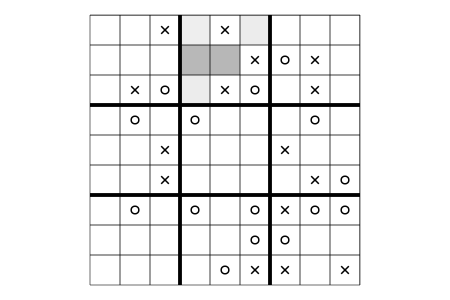

In [171]:
p = init_plot(heatmap)
add_tokens!(p, game)